Question 4

In [32]:
import numpy as np
from scipy.special import comb
import copy
import matplotlib.pyplot as plt
from utils.plotDecBoundaries import plotDecBoundaries

In [33]:
def non_linear_trans_2(X):

    D = X.shape[1]
    K = comb(D + 2, 2) - 1

    transformed_data = np.zeros((X.shape[0], int(K)))

    for i in range(int(X.shape[0])):
        index = 0
        for j in range(D):
            transformed_data[i][index] = X[i][j]
            index += 1
        for j in range(D):
            for k in range(j, D):
                transformed_data[i][index] = X[i][j] * X[i][k]
                index += 1
    return transformed_data

def non_linear_trans_3(X):
    d = 3
    D = X.shape[1]
    K = comb(D + 3, 3) - 1

    transformed_data = np.zeros((X.shape[0], int(K)))

    for i in range(X.shape[0]):
        index = 0
        for j in range(D):
            transformed_data[i][index] = X[i][j]
            index += 1
        for j in range(D):
            for k in range(j, D):
                transformed_data[i][index] = X[i][j] * X[i][k]
                index += 1
                for l in range(k, D):
                    transformed_data[i][index] = X[i][j] * X[i][k] * X[i][l]
                    index += 1

    return transformed_data

def predictor(X, w):
    clas = np.zeros(len(X))
    for i in range(len(X)):
        pred = np.dot(w[: , 1:], X[i].T)
        if pred < 0:
            clas[i] = 0
        else:
            clas[i] = 1
    return clas

def plotDecBoundaries_Nonlinear(feature, labels, w, nld):
    fsize=(6,4)
    legend_on = False

    ## this function is from Prof. Chugg's PlotNonLinear.py script
    ## https://github.com/keithchugg/ee559_spring2023/blob/main/hw_helpers/PlotNonlinear.py
    '''
    Plot the decision boundaries and data points for any binary classifiers
    
    feature: origianl2D feautre, N x 2 array:
        N: number of data points
        2: number of features 
    labels: class lables correspond to feature, N x 1 array: [0,0,1,1,0,0,...]
        N: number of data points
    legend_on: add the legend in the plot. potentially slower for datasets with large number of clases and data points
    ----------------------------
    You need to write the following two functions

    non_linear_trans: your custom non-linear transforation function.
        <feature_nonlinear> = non_linear_trans(<feature_original>), 
            Input: <feature_original>, Nx2 array, 
            Output: <feature_nonlinear>: Nx? array.
        if no nonlinear transformation performs, then, 
        let non_linear_trans = lambda x:x, which just output your original feature
    
    predictor: your custom predictor.
        <predictions> = predictor(<feature>)
            Input: <feature> Nx? array.
            Output: <predictions> binary labels, i.e., array ([0,1,0,0,1...])

    If you don't want write custom functions, you can modify this plot function based on your need,
    do non-linear transformation and class prediction inside this plot function.
    ----------------------------
    '''

    labels = labels.astype(int)

    # Set the feature range for ploting
    max_x = np.ceil(max(feature[:, 0])) + 1
    min_x = np.floor(min(feature[:, 0])) - 1
    max_y = np.ceil(max(feature[:, 1])) + 1
    min_y = np.floor(min(feature[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.05

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.
    
    '''
    You should write the custom functions, non_linear_trans and predictor
    '''
    # apply non-linear transformation to all points in the map (not only data points)
    if nld == 2:
        xy = non_linear_trans_2(xy)
    if nld == 3:
        xy = non_linear_trans_3(xy)
    # predict the class of all points in the map 
    pred_label = predictor(xy, w)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    # documemtation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    symbols_ar = np.array(['rx', 'bo', 'ms', 'cd','gp','y*','kx','gP','r+','bh'])
    #show the image, give each coordinate a color according to its class label
    plt.figure(figsize=fsize)

    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower', aspect='auto')

    # plot the class data.
    plot_index = 0
    class_list = []
    class_list_name = [] #for legend
    for cur_label in np.unique(labels):
        # print(cur_label,plot_index,np.sum(label_train == cur_label))
        d1, = plt.plot(feature[labels == cur_label, 0],feature[labels == cur_label, 1], symbols_ar[plot_index])

        if legend_on:
            class_list.append(d1)
            class_list_name.append('Class '+str(plot_index))
            l = plt.legend(class_list,class_list_name, loc=2)
            plt.gca().add_artist(l)
       
        plot_index = plot_index + 1

    plt.show()

In [34]:
def gen_nonlinear_2(X):

    D = X.shape[1]
    K = comb(D + 2, 2) - 1

    transformed_data = np.zeros((X.shape[0], int(K)))

    for i in range(int(X.shape[0])):
        index = 0
        for j in range(D):
            transformed_data[i][index] = X[i][j]
            index += 1
        for j in range(D):
            for k in range(j, D):
                transformed_data[i][index] = X[i][j] * X[i][k]
                index += 1
    return transformed_data

def gen_nonlinear_3(X):
    d = 3
    D = X.shape[1]
    K = comb(D + 3, 3) - 1

    transformed_data = np.zeros((X.shape[0], int(K)))

    for i in range(X.shape[0]):
        index = 0
        for j in range(D):
            transformed_data[i][index] = X[i][j]
            index += 1
        for j in range(D):
            for k in range(j, D):
                transformed_data[i][index] = X[i][j] * X[i][k]
                index += 1
                for l in range(k, D):
                    transformed_data[i][index] = X[i][j] * X[i][k] * X[i][l]
                    index += 1

    return transformed_data

def train(X, y, epochs=100, lr=0.1):
    d = X.shape[1]
    w = np.ones((1, d))
    w_opt = np.ones((1, d))
    num_samples = X.shape[0]
    itr = 0
    J_min = 100000000
    reflected_data = copy.deepcopy(X)

    for j in range(len(X)):
        if y[j] == 2.0:
            reflected_data[j] *= (-1)
    
    for epoch in range(epochs):
        count = 0
        temp = np.c_[X,y]
        np.random.shuffle(temp)
        X = temp[:, :17]
        y = temp[:, -1]
        for i in range(num_samples):
            z = np.dot(w, reflected_data[i].T)
            if z <= 0:
                w += 1*reflected_data[i]
                count = 0
            else:
                count = count + 1
            jw = Jw(reflected_data, w)
            if jw < J_min:
                J_min = jw
                w_opt = w
        if count == 100:
            break
    return w, J_min, w_opt

def Jw(X, w):
    j = 0
    for i in range(X.shape[0]):
        if np.dot(w, X[i].T) <= 0:
            j -= np.dot(w, X[i].T)
    return j

def classify(X, w):
    clas = np.zeros(len(X))
    for i in range(len(X)):
        pred = np.dot(w, X[i].T)
        if pred < 0:
            clas[i] = 2
        else:
            clas[i] = 1
    return clas

def error(tpl,tl):
    err_count = 0
    for i in range(len(tpl)):
        if (int(tpl[i]) != int(tl[i])):
            err_count = err_count+1
    err_rate = (1-(err_count/len(tpl)))*100
    return err_rate

def plot_dec(data, label, w):
    x_min = min(data[:, 1])
    x_max = max(data[:, 1])
    x = np.linspace(x_min, x_max)
    y = -(w[0]+w[1]*x)/w[2]

    plt.plot(x, y, label='Decision Boundary')
    plt.fill_between(x, y, 4, color='blue', alpha=.5)
    plt.scatter(data[label == 1, 1], data[label == 1, 2],
                color='red', label='Class 1')
    plt.scatter(data[label == 2, 1], data[label == 2, 2],
                color='blue', label='Class 2')
    plt.legend()
    plt.show()

In [35]:
train_data = np.genfromtxt("dataset1_train.csv", delimiter=',')
train_data_points = np.asarray(train_data[:,:2])
train_labels = train_data[:, 2]

test_data = np.genfromtxt("dataset1_test.csv", delimiter=',')
test_data_points = np.asarray(test_data[:,:2])
test_labels = test_data[:, 2]

In [36]:
train_data_aug = np.hstack((np.ones((train_data_points.shape[0], 1)), train_data_points))
w, J_min, w_opt = train(train_data_aug, train_labels)
train_pred_labels = classify(train_data_aug, w_opt)
print("Train data classification accuracy with linear data - ", error(train_pred_labels,train_labels), "%")
plotDecBoundary(train_data_aug,train_pred_labels,w_opt.T)

test_data_aug = np.hstack((np.ones((test_data_points.shape[0], 1)), test_data_points))
test_pred_labels = classify(test_data_aug, w_opt)
print("Test data classification accuracy with linear data - ", error(test_pred_labels,test_labels), "%")
plotDecBoundary(test_data_aug,test_pred_labels,w_opt.T)

Train data classification accuracy with linear data -  100.0 %
Test data classification accuracy with linear data -  97.0 %


In [37]:
train_mean_list = []
test_mean_list = []

for i in range(10):
    w, J_min, w_opt = train(train_data_points, train_labels)
    train_pred_labels = classify(train_data_points, w_opt)
    train_acc = error(train_pred_labels,train_labels)
    train_mean_list.append(train_acc)

    test_pred_labels = classify(test_data_points, w_opt)
    test_acc = error(test_pred_labels,test_labels)
    test_mean_list.append(test_acc)

print("Mean of train data accuracy: ", np.mean(train_mean_list), "%")
print("Mean of test data accuracy: ", np.mean(test_mean_list), "%")

print("Standard Deviation of train data accuracy: ", np.std(train_mean_list), "%")
print("Standard Deviation of test data accuracy: ", np.std(test_mean_list), "%")

Mean of train data accuracy:  91.0 %
Mean of test data accuracy:  84.0 %
Standard Deviation of train data accuracy:  0.0 %
Standard Deviation of test data accuracy:  0.0 %


Train data classification accuracy with quadratic transformation -  100.0 %


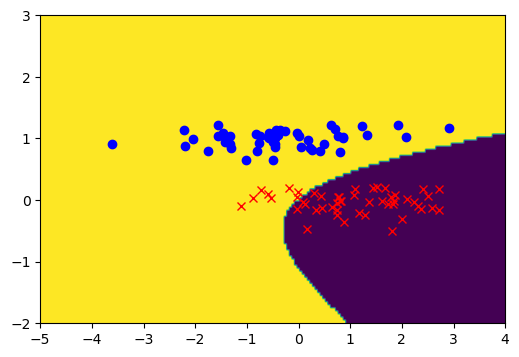

Test data classification accuracy with quadratic transformation -  94.0 %


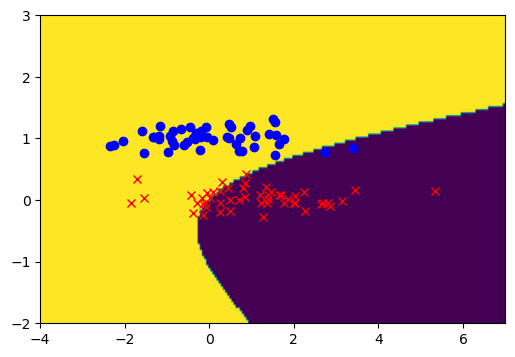

In [38]:
train_nl_data_points = gen_nonlinear_2(train_data_points)
train_nl_aug = np.hstack((np.ones((train_nl_data_points.shape[0], 1)), train_nl_data_points))

w, J_min, w_opt = train(train_nl_aug, train_labels)
train_pred_labels = classify(train_nl_aug, w_opt)
print("Train data classification accuracy with quadratic transformation - ", error(train_pred_labels,train_labels), "%")

train_lables_t = copy.deepcopy(train_labels)
for i in range(train_labels.shape[0]):
    if(train_labels[i] == 2.0):
        train_lables_t[i] = 0

train_pred_lables_t = copy.deepcopy(train_pred_labels)
for i in range(train_pred_labels.shape[0]):
    if(train_pred_labels[i] == 2.0):
        train_pred_lables_t[i] = 0

plotDecBoundaries_Nonlinear(train_data_points, train_lables_t, w_opt, 2)

test_nl_data_points = gen_nonlinear_2(test_data_points)
test_nl_aug = np.hstack((np.ones((test_nl_data_points.shape[0], 1)), test_nl_data_points))

test_pred_labels = classify(test_nl_aug, w_opt)
print("Test data classification accuracy with quadratic transformation - ", error(test_pred_labels,test_labels), "%")

test_lables_t = copy.deepcopy(test_labels)
for i in range(test_labels.shape[0]):
    if(test_labels[i] == 2.0):
        test_lables_t[i] = 0

test_pred_lables_t = copy.deepcopy(test_pred_labels)
for i in range(test_pred_labels.shape[0]):
    if(test_pred_labels[i] == 2.0):
        test_pred_lables_t[i] = 0

plotDecBoundaries_Nonlinear(test_data_points, test_lables_t, w_opt, 2)

In [39]:
train_mean_list = []
test_mean_list = []

for i in range(10):
    w, J_min, w_opt = train(train_nl_aug, train_labels)
    train_pred_labels = classify(train_nl_aug, w_opt)
    train_acc = error(train_pred_labels,train_labels)
    train_mean_list.append(train_acc)

    test_pred_labels = classify(test_nl_aug, w_opt)
    test_acc = error(test_pred_labels,test_labels)
    test_mean_list.append(test_acc)

print("Mean of train data accuracy: ", np.mean(train_mean_list), "%")
print("Mean of test data accuracy: ", np.mean(test_mean_list), "%")

print("Standard Deviation of train data accuracy: ", np.std(train_mean_list), "%")
print("Standard Deviation of test data accuracy: ", np.std(test_mean_list), "%")

Mean of train data accuracy:  100.0 %
Mean of test data accuracy:  94.0 %
Standard Deviation of train data accuracy:  0.0 %
Standard Deviation of test data accuracy:  0.0 %


Train data classification accuracy with cubic transformation -  100.0 %


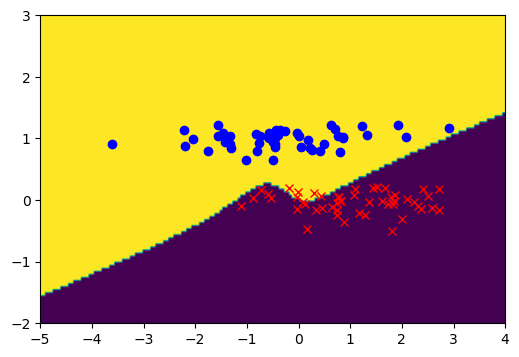

Test data classification accuracy with cubic transformation -  94.0 %


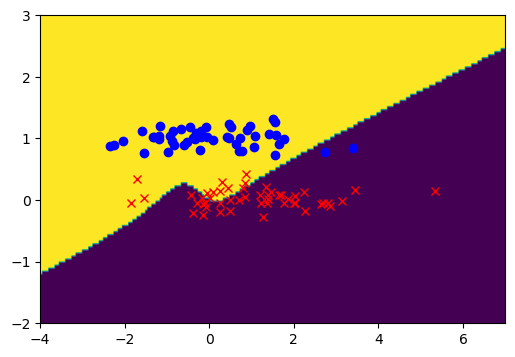

In [40]:
train_nl_data_points = gen_nonlinear_3(train_data_points)
train_nl_aug = np.hstack((np.ones((train_nl_data_points.shape[0], 1)), train_nl_data_points))

w, J_min, w_opt = train(train_nl_aug, train_labels)
train_pred_labels = classify(train_nl_aug, w_opt)
print("Train data classification accuracy with cubic transformation - ", error(train_pred_labels,train_labels), "%")

train_lables_t = copy.deepcopy(train_labels)
for i in range(train_labels.shape[0]):
    if(train_labels[i] == 2.0):
        train_lables_t[i] = 0

train_pred_lables_t = copy.deepcopy(train_pred_labels)
for i in range(train_pred_labels.shape[0]):
    if(train_pred_labels[i] == 2.0):
        train_pred_lables_t[i] = 0

plotDecBoundaries_Nonlinear(train_data_points, train_lables_t, w_opt, 3)

test_nl_data_points = gen_nonlinear_3(test_data_points)
test_nl_aug = np.hstack((np.ones((test_nl_data_points.shape[0], 1)), test_nl_data_points))

test_pred_labels = classify(test_nl_aug, w_opt)
print("Test data classification accuracy with cubic transformation - ", error(test_pred_labels,test_labels), "%")

test_lables_t = copy.deepcopy(test_labels)
for i in range(test_labels.shape[0]):
    if(test_labels[i] == 2.0):
        test_lables_t[i] = 0

test_pred_lables_t = copy.deepcopy(test_pred_labels)
for i in range(test_pred_labels.shape[0]):
    if(test_pred_labels[i] == 2.0):
        test_pred_lables_t[i] = 0

plotDecBoundaries_Nonlinear(test_data_points, test_lables_t, w_opt, 3)

In [41]:
train_mean_list = []
test_mean_list = []

for i in range(10):
    w, J_min, w_opt = train(train_nl_aug, train_labels)
    train_pred_labels = classify(train_nl_aug, w_opt)
    train_acc = error(train_pred_labels,train_labels)
    train_mean_list.append(train_acc)

    test_pred_labels = classify(test_nl_aug, w_opt)
    test_acc = error(test_pred_labels,test_labels)
    test_mean_list.append(test_acc)

print("Mean of train data accuracy: ", np.mean(train_mean_list), "%")
print("Mean of test data accuracy: ", np.mean(test_mean_list), "%")

print("Standard Deviation of train data accuracy: ", np.std(train_mean_list), "%")
print("Standard Deviation of test data accuracy: ", np.std(test_mean_list), "%")

Mean of train data accuracy:  100.0 %
Mean of test data accuracy:  94.0 %
Standard Deviation of train data accuracy:  0.0 %
Standard Deviation of test data accuracy:  0.0 %
